<h1>Clustering</h1>

Clustering with Scikit-Learn

In this notebook we will learn how to do K-Means using Scikit-Learn in Python

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle , islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import datetime

In [2]:
salary=pd.read_csv('/Programacion/Machine Learning/csv/ds_salaries.csv')

In [3]:
salary.describe().transpose() #Esta es otra manera de organizar el describe.

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0
remote_ratio,3755.0,46.271638,48.589050,0.0,0.0,0.0,100.0,100.0


In [4]:
salary.shape

(3755, 11)

In [5]:
salary.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [6]:
salary['employment_type'].unique()

array(['FT', 'CT', 'FL', 'PT'], dtype=object)

In [7]:
salary.columns
x=salary.shape[0]
salary.dropna()
y=salary.shape[0]
print("Se eliminaron:",x-y," filas")

Se eliminaron: 0  filas


In [8]:
clean_data=salary.copy()

In [9]:
clean_data['L_company_size_label']=(clean_data['company_size']=='L')*1
clean_data['M_company_size_label']=(clean_data['company_size']=='M')*0.5
clean_data['S_company_size_label']=(clean_data['company_size']=='S')*0
clean_data['EN_EL']=(clean_data['experience_level']=='EN')*0
clean_data['MI_EL']=(clean_data['experience_level']=='MI')*1
clean_data['SE_EL']=(clean_data['experience_level']=='SE')*2
clean_data['EX_EL']=(clean_data['experience_level']=='EX')*3
clean_data['FT_ET']=(clean_data['employment_type']=='FT')*0
clean_data['CT_ET']=(clean_data['employment_type']=='CT')*1
clean_data['FL_ET']=(clean_data['employment_type']=='FL')*2
clean_data['PT_ET']=(clean_data['employment_type']=='PT')*3
clean_data['High_Salary']=(clean_data['salary']>1350000)*1


In [10]:
clean_data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,S_company_size_label,EN_EL,MI_EL,SE_EL,EX_EL,FT_ET,CT_ET,FL_ET,PT_ET,High_Salary
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,0,0,0,2,0,0,0,0,0,0
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,0,0,1,0,0,0,1,0,0,0
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,0,0,1,0,0,0,1,0,0,0
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,0,0,0,2,0,0,0,0,0,0
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,0,0,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,0,0,0,2,0,0,0,0,0,0
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,0,0,1,0,0,0,0,0,0,0
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,0,0,0,0,0,0,0,0,0,0
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,0,0,0,0,0,0,1,0,0,0


In [11]:
features=['L_company_size_label',"M_company_size_label","S_company_size_label","EN_EL","MI_EL","SE_EL","EX_EL","FT_ET","CT_ET","FL_ET","PT_ET"]


In [12]:
selected_df=clean_data[features]
selected_df.columns

Index(['L_company_size_label', 'M_company_size_label', 'S_company_size_label',
       'EN_EL', 'MI_EL', 'SE_EL', 'EX_EL', 'FT_ET', 'CT_ET', 'FL_ET', 'PT_ET'],
      dtype='object')

In [13]:
#Scale the Features using StandardScaler
x=StandardScaler().fit_transform(selected_df)

<h2>Implementando K-Means Clustering</h2>

In [14]:
#Seteo la cantidad de clusters que quiero generar
kmeans=KMeans(n_clusters=11)
#Ajustamos el modelo 
model=kmeans.fit(x)
print("model\n",model)

C:\Users\Will\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


model
 KMeans(n_clusters=11)


In [15]:
centers=model.cluster_centers_
centers

array([[-3.70855876e-01,  4.36954544e-01,  0.00000000e+00,
         0.00000000e+00, -5.22380470e-01,  7.01746629e-01,
        -1.76946545e-01,  0.00000000e+00, -5.16742389e-02,
        -5.16742389e-02, -6.74380202e-02],
       [-3.70855876e-01,  4.36954544e-01,  0.00000000e+00,
         0.00000000e+00,  1.91431353e+00, -1.42501575e+00,
        -1.76946545e-01,  0.00000000e+00, -5.16742389e-02,
        -5.16742389e-02, -6.74380202e-02],
       [ 2.69646530e+00, -2.28856757e+00,  0.00000000e+00,
         0.00000000e+00, -5.22380470e-01,  7.01746629e-01,
        -1.76946545e-01,  0.00000000e+00, -5.16742389e-02,
        -5.16742389e-02, -6.74380202e-02],
       [ 7.11728068e-01, -1.48694342e+00,  0.00000000e+00,
         0.00000000e+00, -9.23756477e-02, -1.42501575e+00,
        -1.76946545e-01,  0.00000000e+00, -5.16742389e-02,
        -5.16742389e-02,  1.48284306e+01],
       [-6.41237583e-02, -9.25806514e-01,  0.00000000e+00,
         0.00000000e+00,  6.95966527e-01, -7.86987038e-01,
  

<h2>PLOTS</h2>(Guardar las funciones)

In [16]:
#Primero creamos algunas funciones utiles que nos ayudaran a trazar graficos.
def pd_centers(featuresUsed,centers):
    colNames=list(featuresUsed)
    colNames.append('prediction')

    z=[np.append(A,index) for index,A in enumerate(centers)]

    p=pd.DataFrame(z,columns=colNames)
    p['prediction']=p['prediction'].astype(int)
    return p

In [17]:
def parallel_plot(data):
    my_colors=list(islice(cycle(['b','r','g','y','k']),None,len(data)))
    plt.style.use("seaborn-dark")
    plt.figure(figsize=(15,8)).gca().axes.set_ylim(-3,+3)
    parallel_coordinates(data,'prediction',color=my_colors,marker='o')

In [18]:
p=pd_centers(features,centers)
p

,L_company_size_label,M_company_size_label,S_company_size_label,EN_EL,MI_EL,SE_EL,EX_EL,FT_ET,CT_ET,FL_ET,PT_ET,prediction
0,-0.370856,0.436955,0.0,0.0,-0.522380,0.701747,-0.176947,0.0,-0.051674,-0.051674,-0.067438,0
1,-0.370856,0.436955,0.0,0.0,1.914314,-1.425016,-0.176947,0.0,-0.051674,-0.051674,-0.067438,1
2,2.696465,-2.288568,0.0,0.0,-0.522380,0.701747,-0.176947,0.0,-0.051674,-0.051674,-0.067438,2
3,0.711728,-1.486943,0.0,0.0,-0.092376,-1.425016,-0.176947,0.0,-0.051674,-0.051674,14.828431,3
4,-0.064124,-0.925807,0.0,0.0,0.695967,-0.786987,-0.176947,0.0,-0.051674,19.352002,-0.067438,4
5,0.242608,-1.198359,0.0,0.0,0.695967,-0.999663,0.405891,0.0,19.352002,-0.051674,-0.067438,5
6,-0.017978,0.002801,0.0,0.0,-0.522380,-1.425016,5.651424,0.0,-0.051674,-0.051674,-0.067438,6
7,2.696465,-2.288568,0.0,0.0,1.914314,-1.425016,-0.176947,0.0,-0.051674,-0.051674,-0.067438,7
8,-0.370856,0.436955,0.0,0.0,-0.522380,-1.425016,-0.176947,0.0,-0.051674,-0.051674,-0.067438,8
9,-0.370856,-2.288568,0.0,0.0,0.346518,-0.749068,-0.176947,0.0,-0.051674,-0.051674,-0.067438,9


C:\Users\Will\AppData\Local\Temp\ipykernel_4300\1552170332.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark")


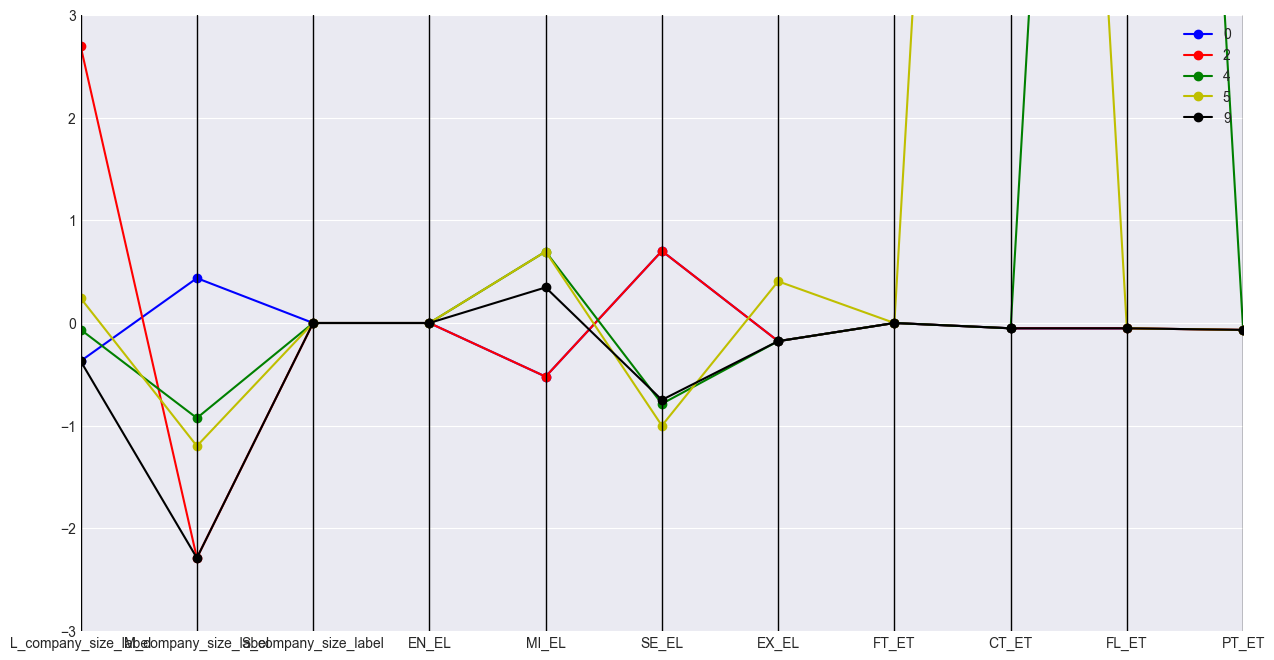

In [19]:
parallel_plot(p[p['SE_EL']>-1.4])